### Problem statement

FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads 
generation channel is digital and through their website. 
FicZon business is majorly dependent on the sales force 
effectiveness. As the market is maturing and more new competitors 
entering the market, FicZon is experiencing the dip in sales. 
Effective sales is dependent on lead quality and as of now, this is 
based on manual categorization and highly depended on sales staff. 
Though there is a quality process, which continuously updates the 
lead categorization, it’s value is in for post analysis, rather than 
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead 
quality and as result, expecting significant increase in sales 
effectiveness.

PROJECT GOAL:
<br>1. Data exploration insights – Sales effectiveness.
<br>2. ML model to predict the Lead Category (High Potential , Low Potential)


###  Importing necessary Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Extracting data from Database using SQL
#db_host = '18.136.157.135:3306' # port: 3306
#db_name = 'project_sales'
#username = 'dm_team2'
#user_pass = 'DM!$Team&27@9!20!'

#conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
#query = "select * from data" # SQL statement
#df = pd.read_sql(query,conn)

In [3]:
#Read csv file
df = pd.read_csv('SalesProject.csv')
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [4]:
df.shape

(7422, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [6]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [7]:
#Dropping the unwanted columns
df.drop(columns=["Mobile","EMAIL"], inplace=True)
df

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Cleaning the data

In [8]:
count = df.isnull().sum()
count[count>0]

Product_ID     58
Source         17
Sales_Agent    23
Location       58
dtype: int64

In [9]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [10]:
#Changing date to pandas date time format
df['date'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')

In [11]:
df.head(5)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,date
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14 10:05:00
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:22:00
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:21:00
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 08:46:00
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 07:34:00


In [12]:
df.drop(columns=["Created"], inplace=True)

In [13]:
#rearrange columns
df = df.reindex(columns = ['date','Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Status'])
df

,date,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,2018-11-14 09:22:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,2018-11-14 09:21:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,2018-11-14 08:46:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,2018-11-14 07:34:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,date,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [17]:
df['Status'].value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [18]:
df['Status'] = df['Status'].str.upper()
df['Status'].value_counts()

JUNK LEAD               1532
NOT RESPONDING          1119
CONVERTED                852
JUST ENQUIRY             751
POTENTIAL                705
LONG TERM                644
IN PROGRESS POSITIVE     642
IN PROGRESS NEGATIVE     625
LOST                     439
OPEN                      19
Name: Status, dtype: int64

In [19]:
# Since no inputs are given from the domain expert we are assuming the potential of the Satus updates
#beased on the conversion rate.
mapping = {'JUNK LEAD':'LOW POTENTIAL', 
           'NOT RESPONDING':'LOW POTENTIAL', 
           'CONVERTED':'HIGH POTENTIAL',
           'JUST ENQUIRY':'LOW POTENTIAL',
           'POTENTIAL':'HIGH POTENTIAL', 
           'LONG TERM':'LOW POTENTIAL',
           'IN PROGRESS POSITIVE':'HIGH POTENTIAL', 
           'IN PROGRESS NEGATIVE':'LOW POTENTIAL', 
           'LOST':'LOW POTENTIAL',
           'OPEN':'LOW POTENTIAL'}
df['LStatus'] = df['Status'].map(mapping)

df['LStatus'].value_counts()

LOW POTENTIAL     5129
HIGH POTENTIAL    2199
Name: LStatus, dtype: int64

In [20]:
df

,date,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,LStatus
0,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,POTENTIAL,HIGH POTENTIAL
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,POTENTIAL,HIGH POTENTIAL
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,POTENTIAL,HIGH POTENTIAL
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,NOT RESPONDING,LOW POTENTIAL
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,IN PROGRESS POSITIVE,HIGH POTENTIAL
...,...,...,...,...,...,...,...,...
7323,2018-04-28 09:45:00,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,LOW POTENTIAL
7324,2018-04-28 09:43:00,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,LOW POTENTIAL
7325,2018-04-28 09:20:00,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,NOT RESPONDING,LOW POTENTIAL
7326,2018-04-28 08:04:00,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,JUST ENQUIRY,LOW POTENTIAL


### Exploratory data analysis

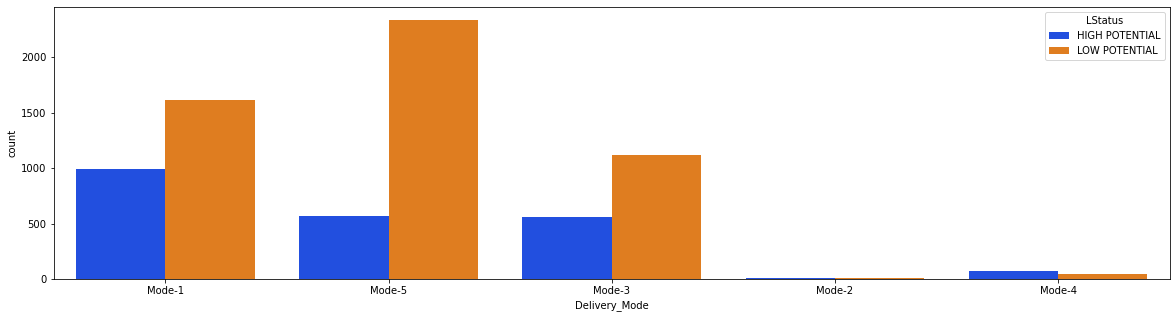

In [21]:
fig,ax = plt.subplots(figsize=[20,5])

chart = sns.countplot(data=df,x='Delivery_Mode',hue='LStatus',palette='bright')

plt.show()
#Observe that Mode-1 has the highest count of HIGH POTENTIAL lead category followed by Mode-3 and Mode-5

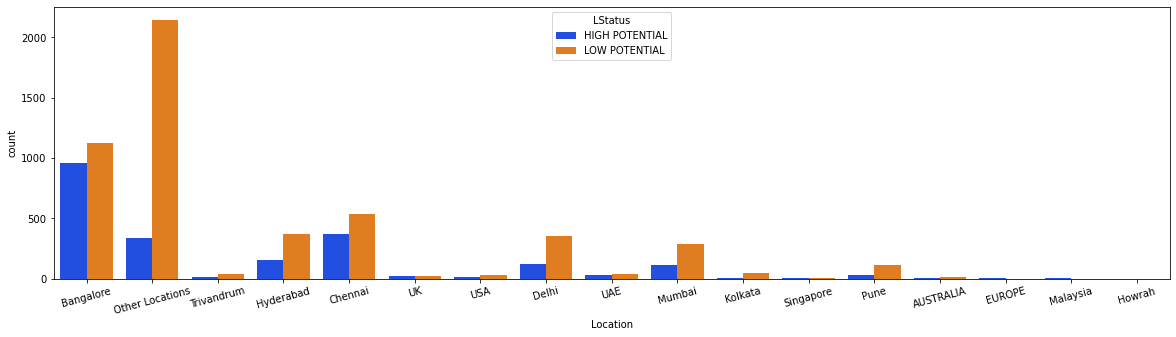

In [22]:
fig,ax = plt.subplots(figsize=[20,5])

chart = sns.countplot(data=df, x='Location',hue='LStatus',palette='bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=15)

plt.show()
#Observe that Bangalore location has highest count of HIGH POTENTIAL lead category followed by Chennai and Hyderabad

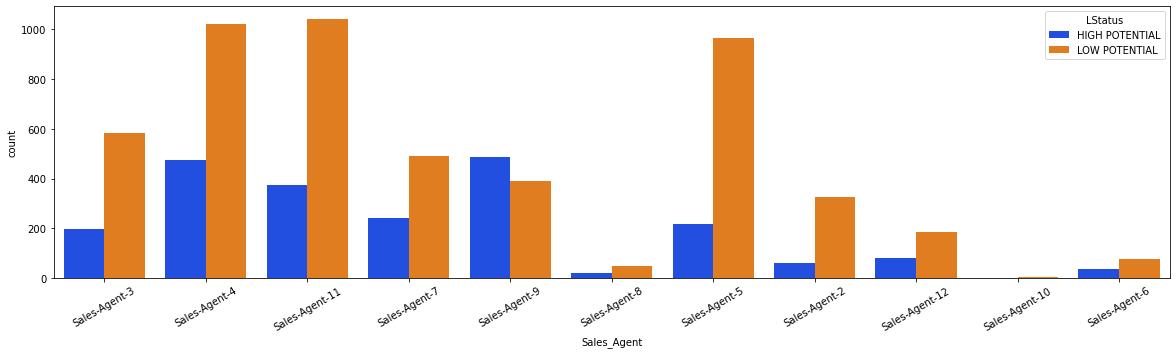

In [23]:
fig,ax = plt.subplots(figsize=[20,5])

chart = sns.countplot(data=df, x='Sales_Agent',hue='LStatus',palette='bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

plt.show()
#Observe that Sales-Agent-9 has the highest count of HIGH POTENTIAL lead category followed by Sales-Agent-4 
#and Sales-Agent-11

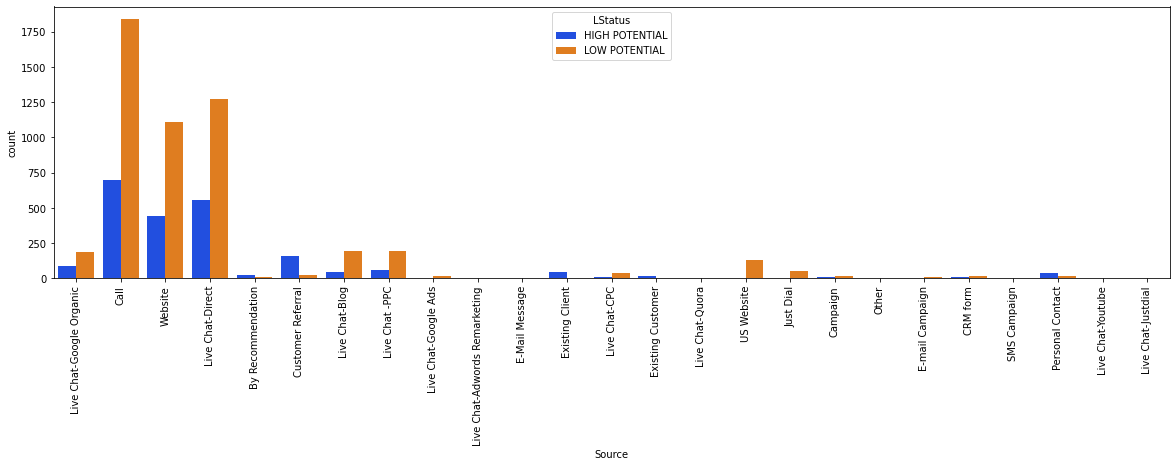

In [24]:
fig,ax = plt.subplots(figsize=[20,5])

chart = sns.countplot(data=df, x='Source',hue='LStatus',palette='bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()
#Observe that 'Call' gives highest count of HIGH POTENTIAL lead category followed by Live chat and website

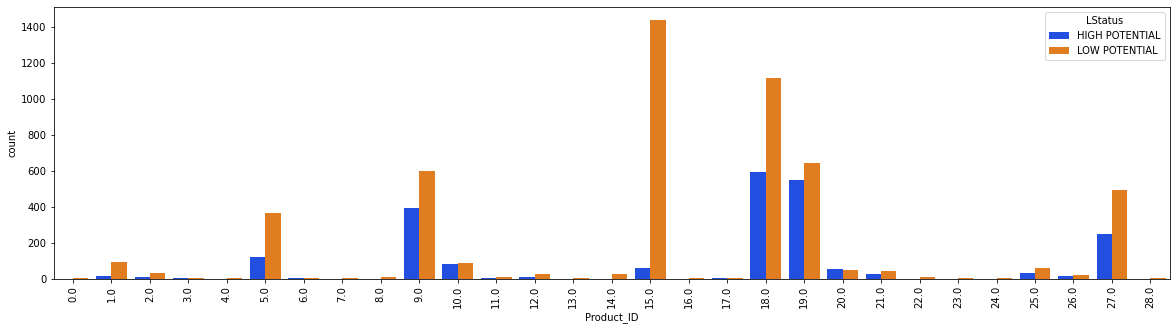

In [25]:
fig,ax = plt.subplots(figsize=[20,5])

chart = sns.countplot(data=df, x='Product_ID',hue='LStatus',palette='bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()
#Observe that Product ID 18 and 19 have highest count of HIGH POTENTIAL lead category followed by Product_ID 9 

In [26]:
df.head()

,date,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,LStatus
0,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,POTENTIAL,HIGH POTENTIAL
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,POTENTIAL,HIGH POTENTIAL
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,POTENTIAL,HIGH POTENTIAL
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,NOT RESPONDING,LOW POTENTIAL
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,IN PROGRESS POSITIVE,HIGH POTENTIAL


In [27]:
df.drop(columns='Status',inplace=True)
df


,date,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,LStatus
0,2018-11-13 18:51:00,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,HIGH POTENTIAL
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,HIGH POTENTIAL
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,HIGH POTENTIAL
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,LOW POTENTIAL
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,HIGH POTENTIAL
...,...,...,...,...,...,...,...
7323,2018-04-28 09:45:00,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,LOW POTENTIAL
7324,2018-04-28 09:43:00,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,LOW POTENTIAL
7325,2018-04-28 09:20:00,5.0,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,LOW POTENTIAL
7326,2018-04-28 08:04:00,21.0,CRM form,Sales-Agent-4,Other Locations,Mode-1,LOW POTENTIAL


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7328 non-null   datetime64[ns]
 1   Product_ID     7328 non-null   float64       
 2   Source         7328 non-null   object        
 3   Sales_Agent    7328 non-null   object        
 4   Location       7328 non-null   object        
 5   Delivery_Mode  7328 non-null   object        
 6   LStatus        7328 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 400.9+ KB


In [29]:
dtype_dict =dict(df.dtypes)
print('Data type of each column of Dataframe :')
dtype_dict

Data type of each column of Dataframe :


{'date': dtype('<M8[ns]'),
 'Product_ID': dtype('float64'),
 'Source': dtype('O'),
 'Sales_Agent': dtype('O'),
 'Location': dtype('O'),
 'Delivery_Mode': dtype('O'),
 'LStatus': dtype('O')}

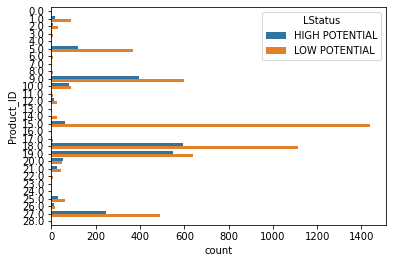

In [30]:
sns.countplot(y='Product_ID',hue='LStatus',data=df)
plt.yticks(rotation=0)
plt.show()

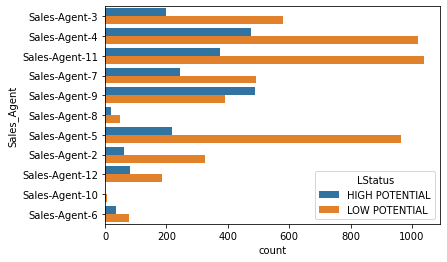

In [31]:
sns.countplot(y='Sales_Agent',hue='LStatus',data=df)
plt.yticks(rotation=0)
plt.show()

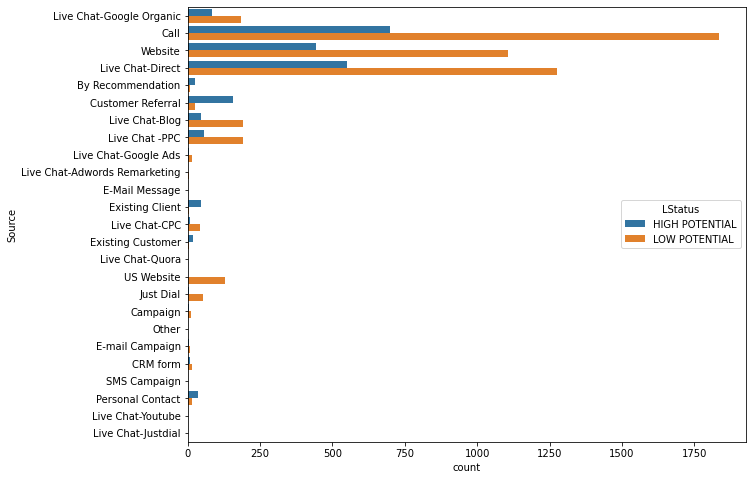

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(y='Source',hue='LStatus',data=df)
plt.yticks(rotation=0)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Other Locations'),
  Text(2, 0, 'Trivandrum'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'UK'),
  Text(6, 0, 'USA'),
  Text(7, 0, 'Delhi'),
  Text(8, 0, 'UAE'),
  Text(9, 0, 'Mumbai'),
  Text(10, 0, 'Kolkata'),
  Text(11, 0, 'Singapore'),
  Text(12, 0, 'Pune'),
  Text(13, 0, 'AUSTRALIA'),
  Text(14, 0, 'EUROPE'),
  Text(15, 0, 'Malaysia'),
  Text(16, 0, 'Howrah')])

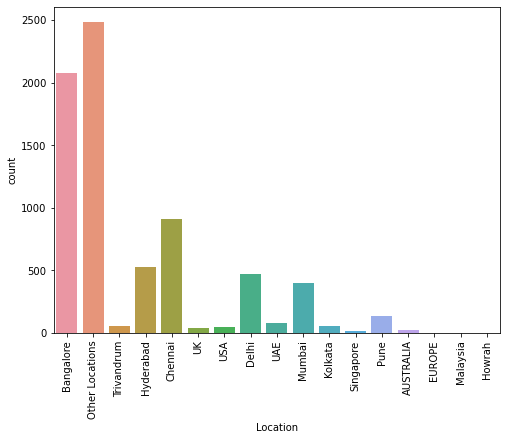

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(df.Location)
plt.xticks(rotation = 90)

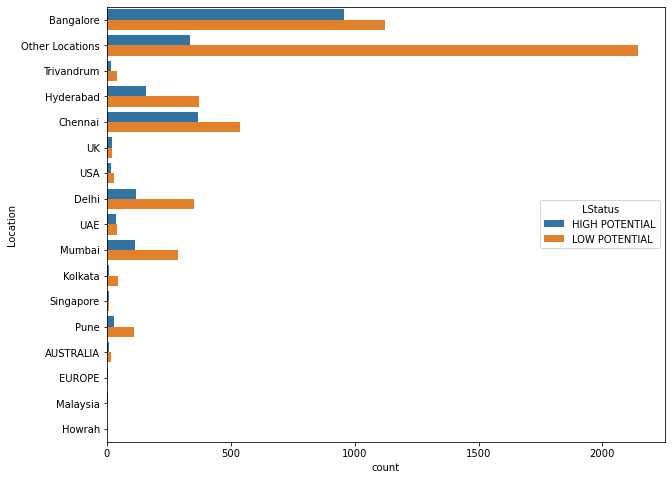

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(y='Location',hue='LStatus',data=df)
plt.yticks(rotation=0)
plt.show()

In [35]:
df = pd.get_dummies(df,columns=['Source','Sales_Agent','Location','Delivery_Mode'])

In [36]:
df.head()

,date,Product_ID,LStatus,Source_By Recommendation,Source_CRM form,Source_Call,Source_Campaign,Source_Customer Referral,Source_E-Mail Message,Source_E-mail Campaign,...,Location_Singapore,Location_Trivandrum,Location_UAE,Location_UK,Location_USA,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,2018-11-13 18:51:00,9.0,HIGH POTENTIAL,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018-11-13 18:48:00,19.0,HIGH POTENTIAL,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-11-13 17:09:00,18.0,HIGH POTENTIAL,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2018-11-13 16:49:00,15.0,LOW POTENTIAL,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018-11-13 16:37:00,18.0,HIGH POTENTIAL,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
mapping = {'HIGH POTENTIAL':1, 'LOW POTENTIAL':0}
df["LStatus"] = df['LStatus'].map(mapping)
df

,date,Product_ID,LStatus,Source_By Recommendation,Source_CRM form,Source_Call,Source_Campaign,Source_Customer Referral,Source_E-Mail Message,Source_E-mail Campaign,...,Location_Singapore,Location_Trivandrum,Location_UAE,Location_UK,Location_USA,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,2018-11-13 18:51:00,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018-11-13 18:48:00,19.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-11-13 17:09:00,18.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2018-11-13 16:49:00,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018-11-13 16:37:00,18.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,2018-04-28 09:45:00,9.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7324,2018-04-28 09:43:00,15.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7325,2018-04-28 09:20:00,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7326,2018-04-28 08:04:00,21.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  7328 non-null   datetime64[ns]
 1   Product_ID                            7328 non-null   float64       
 2   LStatus                               7328 non-null   int64         
 3   Source_By Recommendation              7328 non-null   uint8         
 4   Source_CRM form                       7328 non-null   uint8         
 5   Source_Call                           7328 non-null   uint8         
 6   Source_Campaign                       7328 non-null   uint8         
 7   Source_Customer Referral              7328 non-null   uint8         
 8   Source_E-Mail Message                 7328 non-null   uint8         
 9   Source_E-mail Campaign                7328 non-null   uint8         
 10  

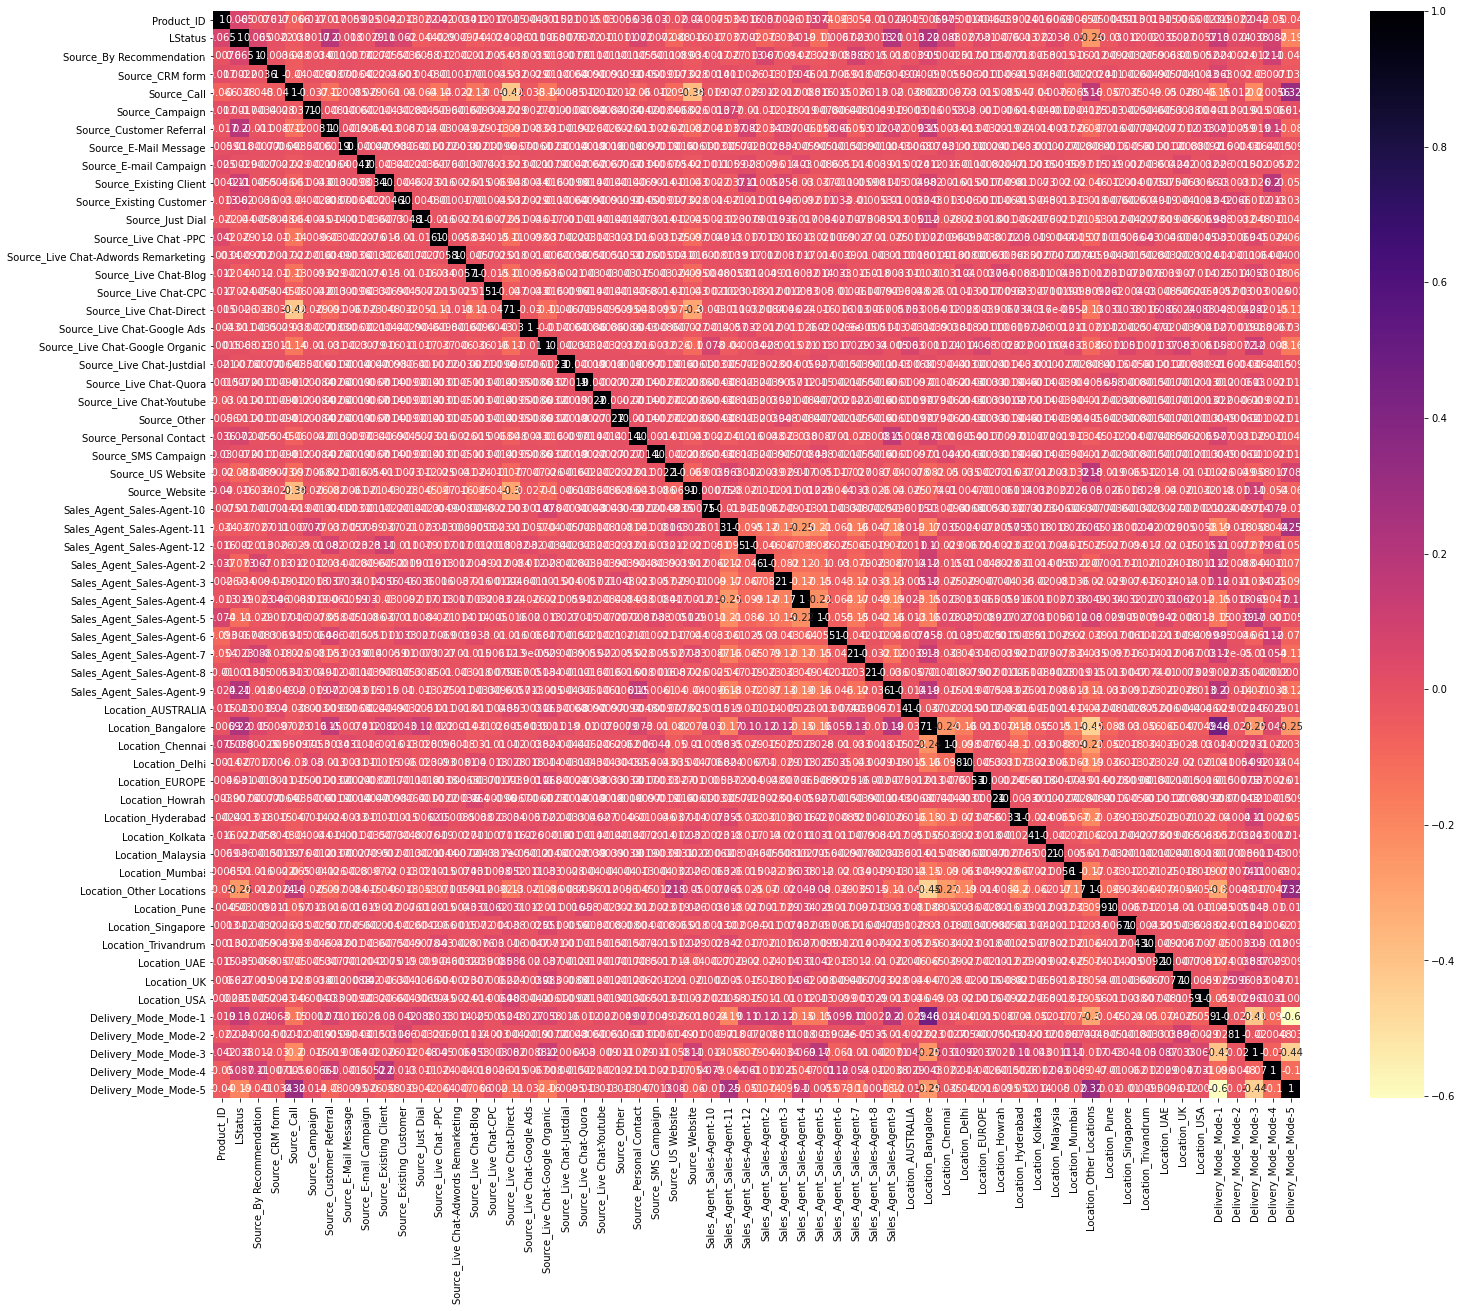

In [39]:
fig,ax=plt.subplots(figsize=[25,20])
cor=df.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns_plot = sns.heatmap(cor,annot =True,cmap='magma_r',square=True)
fig = sns_plot.get_figure()
#fig.savefig("1017corrHeatmap.png")

<AxesSubplot:xlabel='date'>

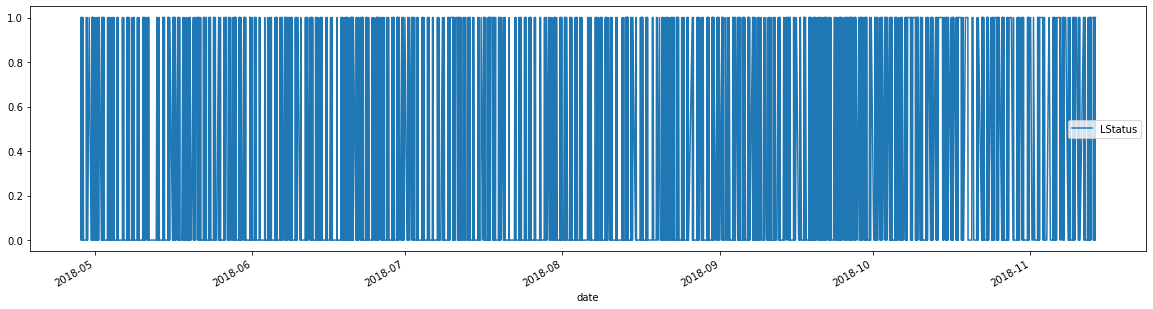

In [40]:
#Plot created date vs LStatus
df.plot(x='date', y='LStatus', figsize=(20,5))

#It can be observed that created date does not have impact on the Status of the lead category
#Hence the 'created date' column can be dropped.

In [41]:
df.drop(columns='date', inplace=True)
df

,Product_ID,LStatus,Source_By Recommendation,Source_CRM form,Source_Call,Source_Campaign,Source_Customer Referral,Source_E-Mail Message,Source_E-mail Campaign,Source_Existing Client,...,Location_Singapore,Location_Trivandrum,Location_UAE,Location_UK,Location_USA,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,9.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,19.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,18.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,9.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7324,15.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7325,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7326,21.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
#choosing X and Y
X = df.drop(columns='LStatus', axis=1)
y = df['LStatus']

In [43]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4396, 59), (2932, 59), (4396,), (2932,))

## Logistic Regression

In [44]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)

#evaluation
a_score = accuracy_score(y_test,y_predict)
p_score = precision_score(y_test,y_predict)
r_score = recall_score(y_test,y_predict)
f_score = f1_score(y_test,y_predict)

print("\naccuracy:{0:0.3f}, precision:{1:0.3f}, recall:{2:0.3f}, f1_score:{3:0.3f}".format(a_score, p_score, r_score, f_score))
#print("classification report:\n",classification_report(y_test,y_predict))
print("confusion matrix:\n",confusion_matrix(y_true=y_test,y_pred=y_predict))

pd.crosstab(y_test,y_predict)


accuracy:0.750, precision:0.693, recall:0.328, f1_score:0.445
confusion matrix:
 [[1905  130]
 [ 603  294]]


col_0,0,1
LStatus,,
0,1905,130
1,603,294


## XGBoost Classifier

In [45]:
#XGBoost

xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train,y_train)
y_predict = xgb_clf.predict(X_test)

a_score = accuracy_score(y_test,y_predict)
p_score = precision_score(y_test,y_predict)
r_score = recall_score(y_test,y_predict)
f_score = f1_score(y_test,y_predict)

print("\naccuracy:{0:0.3f}, precision:{1:0.3f}, recall:{2:0.3f}, f1_score:{3:0.3f}".format(a_score, p_score, r_score, f_score))
#print("classification report:\n",classification_report(y_test,y_predict))
print("confusion matrix:\n",confusion_matrix(y_true=y_test,y_pred=y_predict))


accuracy:0.742, precision:0.614, recall:0.421, f1_score:0.500
confusion matrix:
 [[1797  238]
 [ 519  378]]


### Random forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfr=RandomForestRegressor(n_estimators=100, random_state=3, max_depth=10)
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
msr = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mar = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
a_score = accuracy_score(y_test,y_predict)
print("Mean Squared Error:", msr)
print('---------------')
print("Mean Absolute Error:", mar)
print("r2 score is:",rfr.score(X_train,y_train))
print('----------------')
print("r2 score is:",rfr.score(X_test, y_test))
print("accuracy score is:",a_score)

Mean Squared Error: 0.1705014249174226
---------------
Mean Absolute Error: 0.3324045082084963
r2 score is: 0.3471318367434607
----------------
r2 score is: 0.19703042822002215
accuracy score is: 0.7418144611186903


### ROC & AUC

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test) #---> model predictions
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

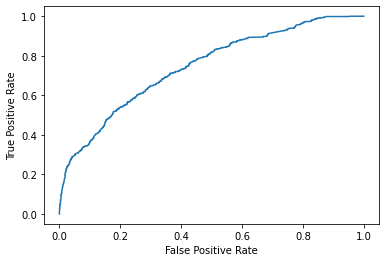

In [51]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

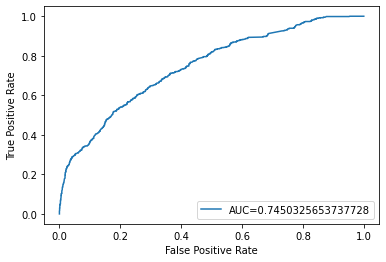

In [52]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

***Inference: AUC score is 0.74 which is close to 1,it means there is a 74% chance that the model will be able to distinguish between positive class and negative class.The model has good measure of seperability.

In [53]:
from sklearn.model_selection import cross_val_score

lr_cvs = cross_val_score(estimator=lr, X=X, y=y, cv=10)
xgb_cvs=cross_val_score(estimator=xgb_clf, X=X, y=y, cv=10)
rfr_cvs = cross_val_score(estimator=rfr, X=X, y=y, cv=10)

print('Logistic regression CrossVal Score:\n',lr_cvs)
print('Random Forest Regression CrossVal Score:\n',xgb_cvs)
print('XG Boost CrossVal Score:\n',rfr_cvs)

Logistic regression CrossVal Score:
 [0.75716235 0.7271487  0.72987722 0.79126876 0.73806276 0.73942701
 0.75579809 0.72578445 0.75273224 0.76229508]
Random Forest Regression CrossVal Score:
 [0.75306958 0.72169168 0.72987722 0.75170532 0.7271487  0.72987722
 0.76125512 0.72987722 0.71994536 0.70901639]
XG Boost CrossVal Score:
 [0.1680445  0.14059337 0.21414952 0.14110306 0.2104894  0.15612469
 0.21038382 0.14655921 0.1115366  0.08476435]


***Inference: We can see that both Logistic regression and Random forest perform well for the given dataset through cross validation, like observed in the AUC score we can see that close to 74%-75% of the data can accurately classify the high potential and low potential leads.